# Get results for all models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
import pickle
import tensorflow as tf

In [2]:
def plot_confusion_matrix(cm, model_name, class_names=["Home Win", "Draw", "Away Win"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(cax, ax=ax)
    ax.set_title(f"Confusion Matrix: {model_name}")
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_names)
    
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, format(cm[i, j], "d"),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

## Load all models

In [3]:
logreg_model_path = "../Models/saved_models_result/logistic_regression_model.pkl"
logreg_l2_model_path = "../Models/saved_models_result/logistic_regression_model_l2.pkl"
random_forest_model_path = "../Models/saved_models_result/random_forest_model.pkl"
xgboost_model_path = "../Models/saved_models_result/xgboost_model.pkl"
svm_model_path = "../Models/saved_models_result/svm_model.pkl"
mlp_model_path = "../Models/saved_models_result/mlp_result_model.h5"
mlp_scaler_path = "../Models/saved_models_result/mlp_scaler.pkl"

In [4]:
with open(logreg_model_path, 'rb') as f:
    logreg_model = pickle.load(f)

with open(logreg_l2_model_path, 'rb') as f:
    logreg_l2_model = pickle.load(f)

with open(random_forest_model_path, 'rb') as f:
    random_forest_model = pickle.load(f)

with open(xgboost_model_path, 'rb') as f:
    xgboost_model = pickle.load(f)

with open(svm_model_path, 'rb') as f:
    svm_model = pickle.load(f)

mlp_model = tf.keras.models.load_model(mlp_model_path)

with open(mlp_scaler_path, 'rb') as f:
    mlp_scaler = pickle.load(f)

## Load all dataset to use

In [5]:
X_OHE_test = pd.read_csv("../Data/test_dataset/X_OHE_test.csv")
y_OHE_test = pd.read_csv("../Data/test_dataset/y_OHE_test.csv")
X_OHE_scaled_test = pd.read_csv("../Data/test_dataset/X_OHE_scaled_test.csv")
X_LAB_test = pd.read_csv("../Data/test_dataset/X_LAB_test.csv")
y_LAB_test = pd.read_csv("../Data/test_dataset/y_LAB_test.csv")

## Logistic Regression

### Logistic Regression

In [6]:
y_pred_log_reg = logreg_model.predict(X_OHE_test)

log_reg_acc = accuracy_score(y_OHE_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_OHE_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_OHE_test, y_pred_log_reg, average='weighted')
log_reg_prec = precision_score(y_OHE_test, y_pred_log_reg, average='weighted')
log_reg_report = classification_report(y_OHE_test, y_pred_log_reg, target_names=["Home Win", "Draw", "Away Win"])
log_reg_cm = confusion_matrix(y_OHE_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_acc)
print("Logistic Regression F1 Score:", log_reg_f1)
print("Logistic Regression Recall:", log_reg_recall)
print("Logistic Regression Precision:", log_reg_prec)
print("Logistic Regression Classification Report:\n", log_reg_report)
print("Logistic Regression Confusion Matrix:\n", log_reg_cm)


Logistic Regression Accuracy: 0.6439716312056738
Logistic Regression F1 Score: 0.61769608004969
Logistic Regression Recall: 0.6439716312056738
Logistic Regression Precision: 0.6128668704555229
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Home Win       0.71      0.81      0.76       316
        Draw       0.41      0.20      0.27       163
    Away Win       0.63      0.73      0.67       226

    accuracy                           0.64       705
   macro avg       0.58      0.58      0.57       705
weighted avg       0.61      0.64      0.62       705

Logistic Regression Confusion Matrix:
 [[257  28  31]
 [ 65  33  65]
 [ 42  20 164]]


### Logistic Regression with L2

In [7]:
y_pred_log_reg_l2 = logreg_l2_model.predict(X_OHE_test)

log_reg_l2_acc = accuracy_score(y_OHE_test, y_pred_log_reg_l2)
log_reg_l2_f1 = f1_score(y_OHE_test, y_pred_log_reg_l2, average='weighted')
log_reg_l2_recall = recall_score(y_OHE_test, y_pred_log_reg_l2, average='weighted')
log_reg_l2_prec = precision_score(y_OHE_test, y_pred_log_reg_l2, average='weighted')
log_reg_l2_report = classification_report(y_OHE_test, y_pred_log_reg_l2, target_names=["Home Win", "Draw", "Away Win"])
log_reg_l2_cm = confusion_matrix(y_OHE_test, y_pred_log_reg_l2)

print("Logistic Regression L2 Accuracy:", log_reg_l2_acc)
print("Logistic Regression L2 F1 Score:", log_reg_l2_f1)
print("Logistic Regression L2 Precision:", log_reg_l2_prec)
print("Logistic Regression L2 Classification Report:\n", log_reg_l2_report)
print("Logistic Regression L2 Confusion Matrix:\n", log_reg_l2_cm)

Logistic Regression L2 Accuracy: 0.6510638297872341
Logistic Regression L2 F1 Score: 0.6217836476039966
Logistic Regression L2 Precision: 0.6205302245529397
Logistic Regression L2 Classification Report:
               precision    recall  f1-score   support

    Home Win       0.70      0.82      0.76       316
        Draw       0.44      0.20      0.27       163
    Away Win       0.64      0.74      0.69       226

    accuracy                           0.65       705
   macro avg       0.59      0.59      0.57       705
weighted avg       0.62      0.65      0.62       705

Logistic Regression L2 Confusion Matrix:
 [[260  24  32]
 [ 70  32  61]
 [ 42  17 167]]


## Random Forest

In [8]:
y_pred_random_forest = random_forest_model.predict(X_LAB_test)

rf_acc = accuracy_score(y_LAB_test, y_pred_random_forest)
rf_f1 = f1_score(y_LAB_test, y_pred_random_forest, average='weighted')
rf_recall = recall_score(y_LAB_test, y_pred_random_forest, average='weighted')
rf_prec = precision_score(y_LAB_test, y_pred_random_forest, average='weighted')
rf_report = classification_report(y_LAB_test, y_pred_random_forest, target_names=["Home Win", "Draw", "Away Win"])
rf_cm = confusion_matrix(y_LAB_test, y_pred_random_forest)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Precision:", rf_prec)
print("Random Forest Classification Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_cm)

Random Forest Accuracy: 0.6042553191489362
Random Forest F1 Score: 0.5928160656961553
Random Forest Precision: 0.5881376815479238
Random Forest Classification Report:
               precision    recall  f1-score   support

    Home Win       0.71      0.69      0.70       316
        Draw       0.32      0.24      0.27       163
    Away Win       0.61      0.74      0.67       226

    accuracy                           0.60       705
   macro avg       0.55      0.56      0.55       705
weighted avg       0.59      0.60      0.59       705

Random Forest Confusion Matrix:
 [[219  53  44]
 [ 62  39  62]
 [ 28  30 168]]


## XGBoost

In [9]:
y_pred_xgb = xgboost_model.predict(X_LAB_test)

xgb_acc = accuracy_score(y_LAB_test, y_pred_xgb)
xgb_f1 = f1_score(y_LAB_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_LAB_test, y_pred_xgb, average='weighted')
xgb_prec = precision_score(y_LAB_test, y_pred_xgb, average='weighted')
xgb_report = classification_report(y_LAB_test, y_pred_xgb, target_names=["Home Win", "Draw", "Away Win"])
xgb_cm = confusion_matrix(y_LAB_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_acc)
print("XGBoost F1 Score:", xgb_f1)
print("XGBoost Precision:", xgb_prec)
print("XGBoost Classification Report:\n", xgb_report)
print("XGBoost Confusion Matrix:\n", xgb_cm)

XGBoost Accuracy: 0.6354609929078014
XGBoost F1 Score: 0.5702997341392693
XGBoost Precision: 0.5564798971234289
XGBoost Classification Report:
               precision    recall  f1-score   support

    Home Win       0.67      0.85      0.75       316
        Draw       0.25      0.04      0.06       163
    Away Win       0.62      0.77      0.69       226

    accuracy                           0.64       705
   macro avg       0.51      0.55      0.50       705
weighted avg       0.56      0.64      0.57       705

XGBoost Confusion Matrix:
 [[269  12  35]
 [ 87   6  70]
 [ 47   6 173]]


## SVM

In [10]:
y_pred_svm = svm_model.predict(X_OHE_scaled_test)

svm_acc = accuracy_score(y_OHE_test, y_pred_svm)
svm_f1 = f1_score(y_OHE_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_OHE_test, y_pred_svm, average='weighted')
svm_prec = precision_score(y_OHE_test, y_pred_svm, average='weighted')
svm_report = classification_report(y_OHE_test, y_pred_svm, target_names=["Home Win", "Draw", "Away Win"])
svm_cm = confusion_matrix(y_OHE_test, y_pred_svm)

print("SVM Accuracy:", svm_acc)
print("SVM F1 Score:", svm_f1)
print("SVM Precision:", svm_prec)
print("SVM Classification Report:\n", svm_report)
print("SVM Confusion Matrix:\n", svm_cm)

SVM Accuracy: 0.6056737588652482
SVM F1 Score: 0.6152543292003659
SVM Precision: 0.6294678094130896
SVM Classification Report:
               precision    recall  f1-score   support

    Home Win       0.73      0.68      0.70       316
        Draw       0.34      0.44      0.38       163
    Away Win       0.69      0.63      0.66       226

    accuracy                           0.61       705
   macro avg       0.59      0.58      0.58       705
weighted avg       0.63      0.61      0.62       705

SVM Confusion Matrix:
 [[214  83  19]
 [ 48  71  44]
 [ 30  54 142]]


/Users/poomk/anaconda3/envs/FYP_ML/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


## MLP (NN)

In [11]:
y_pred_mlp_prob = mlp_model.predict(X_OHE_scaled_test)
y_pred_mlp = np.argmax(y_pred_mlp_prob, axis=1)

mlp_acc = accuracy_score(y_OHE_test, y_pred_mlp)
mlp_f1 = f1_score(y_OHE_test, y_pred_mlp, average='weighted')
mlp_recall = recall_score(y_OHE_test, y_pred_mlp, average='weighted')
mlp_prec = precision_score(y_OHE_test, y_pred_mlp, average='weighted')
mlp_report = classification_report(y_OHE_test, y_pred_mlp, target_names=["Home Win", "Draw", "Away Win"])
mlp_cm = confusion_matrix(y_OHE_test, y_pred_mlp)

print("MLP Accuracy:", mlp_acc)
print("MLP F1 Score:", mlp_f1)
print("MLP Precision:", mlp_prec)
print("MLP Classification Report:\n", mlp_report)
print("MLP Confusion Matrix:\n", mlp_cm)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MLP Accuracy: 0.625531914893617
MLP F1 Score: 0.6024818484043296
MLP Precision: 0.5953031378772773
MLP Classification Report:
               precision    recall  f1-score   support

    Home Win       0.69      0.78      0.73       316
        Draw       0.37      0.20      0.26       163
    Away Win       0.62      0.72      0.67       226

    accuracy                           0.63       705
   macro avg       0.56      0.57      0.55       705
weighted avg       0.60      0.63      0.60       705

MLP Confusion Matrix:
 [[246  34  36]
 [ 67  33  63]
 [ 42  22 162]]


# Compare all models

In [12]:
table_data = [
    ["Logistic Regression", f"{log_reg_acc:.4f}", f"{log_reg_f1:.4f}", f"{log_reg_recall:.4f}", f"{log_reg_prec:.4f}"],
    ["Logistic Regression L2", f"{log_reg_l2_acc:.4f}", f"{log_reg_l2_f1:.4f}", f"{log_reg_l2_recall:.4f}", f"{log_reg_l2_prec:.4f}"],
    ["Random Forest", f"{rf_acc:.4f}", f"{rf_f1:.4f}", f"{rf_recall:.4f}", f"{rf_prec:.4f}"],
    ["XGBoost", f"{xgb_acc:.4f}", f"{xgb_f1:.4f}", f"{xgb_recall:.4f}", f"{xgb_prec:.4f}"],
    ["SVM", f"{svm_acc:.4f}", f"{svm_f1:.4f}", f"{svm_recall:.4f}", f"{svm_prec:.4f}"],
    ["MLP", f"{mlp_acc:.4f}", f"{mlp_f1:.4f}", f"{mlp_recall:.4f}", f"{mlp_prec:.4f}"],
]

columns = ["Model", "Accuracy", "F1 Score", "Recall", "Precision"]

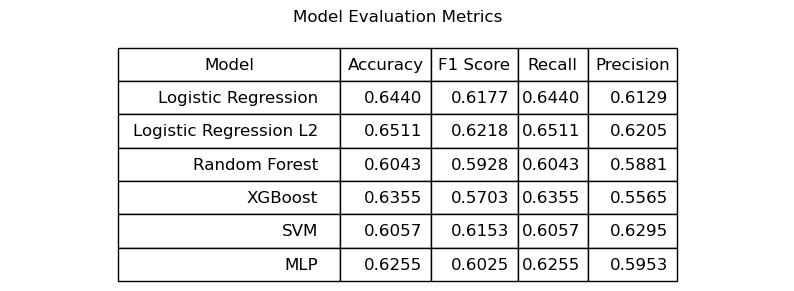

In [13]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=table_data,
    colLabels=columns,
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(columns))))
table.scale(1.2, 2)

plt.title("Model Evaluation Metrics", pad=20)
plt.show()

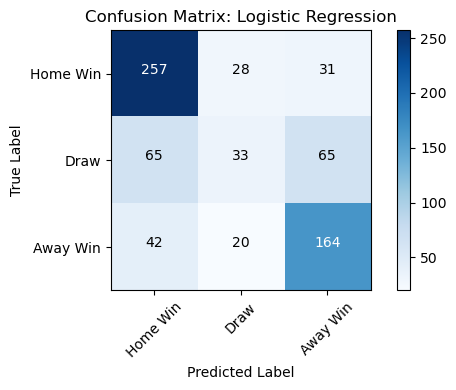

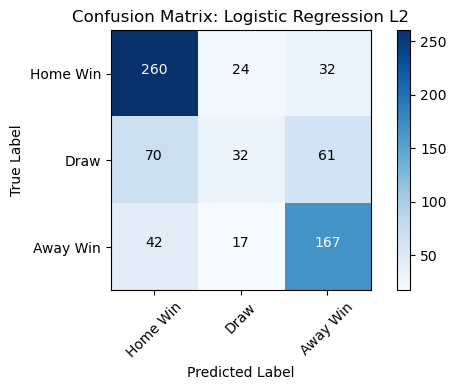

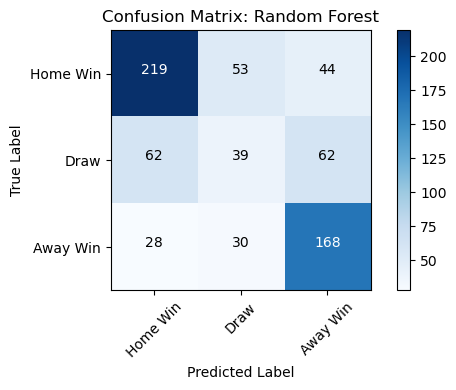

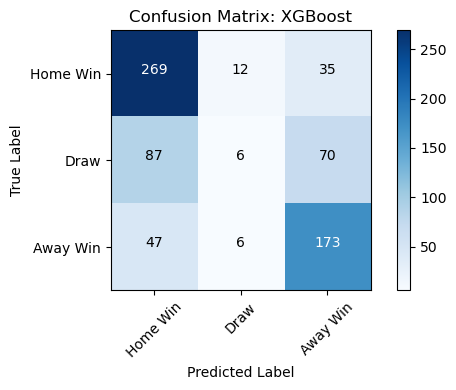

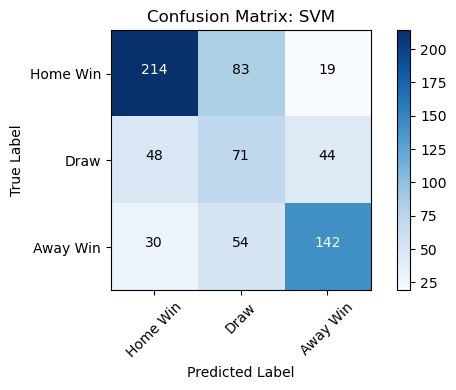

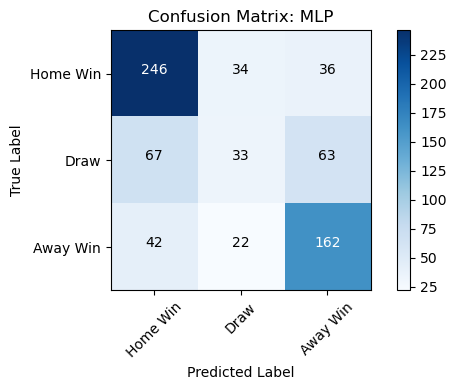

In [14]:
plot_confusion_matrix(log_reg_cm, "Logistic Regression")
plot_confusion_matrix(log_reg_l2_cm, "Logistic Regression L2")
plot_confusion_matrix(rf_cm, "Random Forest")
plot_confusion_matrix(xgb_cm, "XGBoost")
plot_confusion_matrix(svm_cm, "SVM")
plot_confusion_matrix(mlp_cm, "MLP")